In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
df = pd.read_csv('training-dataset.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df.shape

(1599999, 6)

In [7]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = columns
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df.isnull().sum()


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
df['target'].unique()

array([0, 4], dtype=int64)

In [10]:
df['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [11]:
df.replace({'target': {4:1}}, inplace=True)


In [12]:
df['target'].unique()

array([0, 1], dtype=int64)

In [13]:
df.drop(['ids', 'date', 'flag', 'user'], axis=1, inplace=True)
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [14]:
df_sampled = df.sample(n=500000, random_state=42)
# df_sampled = df

In [15]:
df_sampled.head()

,target,text
541200,0,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,I'm off too bed. I gotta wake up hella early t...
766711,0,I havent been able to listen to it yet My spe...
285055,0,now remembers why solving a relatively big equ...
705995,0,"Ate too much, feel sick"


In [17]:
df_sampled['target'].value_counts()

target
1    250625
0    249375
Name: count, dtype: int64

In [18]:
def preprocess(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = text.split() #split all the word and load into a list
  text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [19]:
df_sampled['new'] = df_sampled['text'].apply(preprocess)

In [20]:
df_sampled.head()

,target,text,new
541200,0,@Nkluvr4eva My poor little dumpling In Holmde...,nkluvr eva poor little dumpling holmdel vids r...
750,0,I'm off too bed. I gotta wake up hella early t...,bed gotta wake hella early tomorrow morning
766711,0,I havent been able to listen to it yet My spe...,havent able listen yet speaker busted
285055,0,now remembers why solving a relatively big equ...,remembers solving relatively big equation two ...
705995,0,"Ate too much, feel sick",ate much feel sick


In [21]:
X = df_sampled['new'].values
y = df_sampled['target'].values

In [22]:
print(X)
print(y)

['nkluvr eva poor little dumpling holmdel vids really trying hope dont try hard tonight xx'
 'bed gotta wake hella early tomorrow morning'
 'havent able listen yet speaker busted' ... 'hazeymarie want wait'
 'bookcrossingfan wow wonder odds happening finger crossed journal entry time'
 'wanted orange chicken']
[0 0 0 ... 0 1 0]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
print(X_train.shape, X_test.shape,)
print(y_train.shape, y_test.shape,)

(400000, 227702) (100000, 227702)
(400000,) (100000,)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Here X should be your list/Series of text, not already vectorized
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Now vectorize the text
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train_text)  # fit on training text
X_test = vectorizer.transform(X_test_text)       # transform test text


In [36]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2586005 stored elements and shape (400000, 5000)>
  Coords	Values
  (0, 698)	0.6152380167117282
  (0, 1523)	0.48811173095093907
  (0, 4834)	0.6190550225147174
  (1, 3266)	1.0
  (2, 3864)	0.2959941047335775
  (2, 469)	0.3032422762458294
  (2, 600)	0.38840863504011847
  (2, 253)	0.2735733939027787
  (2, 3098)	0.19177515224575686
  (2, 1155)	0.32700348707787114
  (2, 1244)	0.23873412104441946
  (2, 2775)	0.28200124110366537
  (2, 2533)	0.3957408265964536
  (2, 742)	0.2208573186016533
  (2, 1039)	0.33032032196795974
  (4, 3266)	0.3447195810375716
  (4, 742)	0.2715310569897476
  (4, 1831)	0.454505121421213
  (4, 3624)	0.36257588313183287
  (4, 1778)	0.26393905344815
  (4, 3288)	0.4293409174320465
  (4, 1241)	0.4641181657680234
  (5, 4896)	0.2730748677971387
  (5, 3779)	0.3702795947083036
  (5, 2471)	0.21626164766954983
  :	:
  (399997, 4420)	0.2767445940686493
  (399997, 948)	0.29341099110858254
  (399997, 336)	0.2934109911085825

In [46]:
LR = LogisticRegression(max_iter=1000, C=0.1)  #
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [47]:
LR_prediction = LR.predict(X_train)
LR_training_accuracy = accuracy_score(y_train, LR_prediction)

In [48]:
print(f'Training Accuracy: {LR_training_accuracy}')

Training Accuracy: 0.7693225


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
LR_prediction = LR.predict(X_test)
LR_testing_accuracy = accuracy_score(y_test, LR_prediction)
print(f'Testing Accuracy: {LR_testing_accuracy}')

Testing Accuracy: 0.7654


In [50]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()


In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dt_prediction = dt.predict(X_train)
dt_training_accuracy = accuracy_score(y_train, dt_prediction)
print(f'Training Accuracy: {dt_training_accuracy}')

Training Accuracy: 0.99751


In [42]:
dt_prediction = dt.predict(X_test)
dt_testing_accuracy = accuracy_score(y_test, dt_prediction)
print(f'Testing Accuracy: {dt_testing_accuracy}')

Testing Accuracy: 0.69848


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=10, random_state=42)

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [45]:
rf_prediction = rf.predict(X_train)
rf_training_accuracy = accuracy_score(y_train, rf_prediction)
print(f'Training Accuracy: {rf_training_accuracy}')

Training Accuracy: 0.9858175


In [46]:
rf_prediction = rf.predict(X_test)
rf_testing_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Testing Accuracy: {rf_testing_accuracy}')

Testing Accuracy: 0.73518


In [47]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'] * 2,
    'Accuracy': [LR_training_accuracy, rf_training_accuracy, dt_training_accuracy, LR_testing_accuracy, rf_testing_accuracy, dt_testing_accuracy],  
    'Type': ['Train', 'Train', 'Train', 'Test', 'Test', 'Test']
}
data = pd.DataFrame(data)
data 

,Model,Accuracy,Type
0,Logistic Regression,0.803543,Train
1,Random Forest,0.985818,Train
2,Decision Tree,0.997510,Train
3,Logistic Regression,0.775120,Test
4,Random Forest,0.735180,Test
5,Decision Tree,0.698480,Test


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

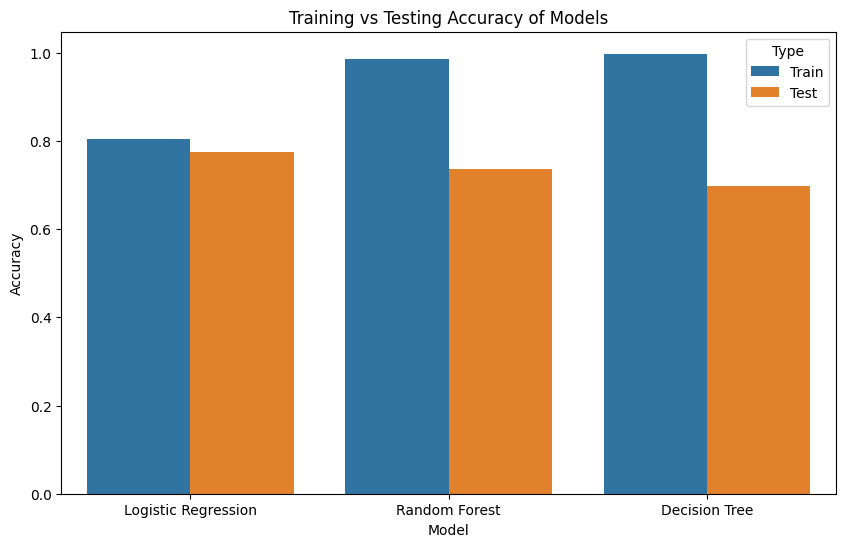

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x='Model', y='Accuracy', hue='Type')
plt.title('Training vs Testing Accuracy of Models')
plt.show()

In [52]:
import pickle

In [55]:
filename = 'new-trained-model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [68]:
new_prediction = "Humans are the Best"
new_prediction = vectorizer.transform([new_prediction])

In [57]:
load_model = pickle.load(open(filename, 'rb'))

In [71]:
pred = load_model.predict(new_prediction)

if pred == 0:
  print("Negative")
else:
  print("Positive")

Positive
